In [ ]:
import numpy as np
from spatialmath import SE3, SO3
import sympy as sp
from sympy import diff, Matrix, cos, sin
from SimpleTranformations import *
import numpy as np
import roboticstoolbox as rtb
from spatialmath import SE3, SO3
import sympy as sp
from sympy import diff, Matrix
from tqdm import tqdm

In [ ]:
setup_symbolic(True)

In [ ]:
rad = np.pi/180
q = list(sp.symbols("q1:7"))
d = list(sp.symbols("d1:9"))
T = tranz(d[0])*(rotz(q[0])*(trany(d[1])*roty(90*rad))) * (roty(q[1])*(trany(d[2])*tranz(d[3]))) * (roty(q[2])*(tranz(d[4])*roty(90*rad))) * (roty(q[3])*(trany(d[5]))) * (rotz(q[4])*(tranz(d[6]))) * (roty(q[5])*trany(d[7])*rotz(90*rad))

In [ ]:
dtheta = 0
dlink = 0
q1 = (90 + dtheta)* rad
q2 = (90 - dtheta)* rad
q3 = (90 + dtheta)* rad
q4 = (90 - dtheta)* rad
q5 = (90 + dtheta)* rad
q6 = (90 - dtheta)* rad
d1 = 0.1273 + dlink #0.1273
d2 = 0.2209 - dlink #-0.176
d3 = -0.1719 + dlink #-0.612
d4 = 0.612 - dlink #0.128
d5 = 0.5723 + dlink #-0.5723
d6 = 0.1149 - dlink #-0.2077
d7 = 0.1157 + dlink #-0.116
d8 = 0.0922 - dlink #-0.092
eval(f"{T}")

In [ ]:
ideal_robot = rtb.models.URDF.UR10()
print(ideal_robot)

In [ ]:
set_point = np.array([np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2, np.pi/2])*1


In [ ]:
# Forward Kinematics for the ideal robot
print("Robots initial set point: \n", ideal_robot.qr)
Te = ideal_robot.fkine(set_point)
print("Forward kinematics of the Robot to initial set point: \n", Te)
#print(robot.ets())
Te_np = np.array(Te)
Te_xyz_ideal = Te_np[0:3, 3]
Te_xyz_ideal

In [ ]:
d = sp.symbols("d")
phi = sp.symbols("phi")
HTx = diff(tranx(d))
HTy = diff(trany(d))
HTz = diff(tranz(d))

HRx = diff(rotx(phi)).subs(phi, 0)
HRy = diff(roty(phi)).subs(phi, 0)
HRz = diff(rotz(phi)).subs(phi, 0)

In [ ]:
#p = np.pi/2
p = sp.symbols("p")
q = list(sp.symbols("q1:7"))
d = list(sp.symbols("d1:9"))

In [ ]:
T_base = tranz(d[0])
T_tool = rotz(p)

In [ ]:
T_robot = T_base * sp.simplify(rotz(q[0])*trany(d[1])) * sp.simplify(roty(q[1]+p)*trany(d[2])*tranz(d[3])) * sp.simplify(roty(q[2])*tranz(d[4])) * sp.simplify(roty(q[3]+p)*trany(d[5])) * sp.simplify(rotz(q[4])*tranz(d[6])) * sp.simplify(roty(q[5])*trany(d[7])) * T_tool

In [ ]:
# T_robot = sp.simplify(T_robot)
# T_robot

In [ ]:
T_robot_inv = T_tool.inv() * sp.simplify((roty(q[5])*trany(d[7])).inv()) * sp.simplify((rotz(q[4])*tranz(d[6])).inv()) * sp.simplify((roty(q[3]+p)*trany(d[5])).inv()) * sp.simplify((roty(q[2])*tranz(d[4])).inv()) * sp.simplify((roty(q[1]+p)*trany(d[2])*tranz(d[3])).inv()) * sp.simplify((rotz(q[0])*trany(d[1])).inv()) * T_base.inv()

In [ ]:
# T_robot_inv = sp.simplify(T_robot_inv)
# T_robot_inv

In [ ]:
dT1 = T_base * rotz(q[0])*HTy*roty(q[1]+p)*trany(d[2])*tranz(d[3])*roty(q[2])*tranz(d[4])*roty(q[3]+p)*trany(d[5])*rotz(q[4])*tranz(d[6])*roty(q[5])*trany(d[7]) * T_tool

dT2 = T_base * rotz(q[0])*trany(d[1])*HRy*roty(q[1]+p)*trany(d[2])*tranz(d[3])*roty(q[2])*tranz(d[4])*roty(q[3]+p)*trany(d[5])*rotz(q[4])*tranz(d[6])*roty(q[5])*trany(d[7]) * T_tool

dT3 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*HTy*tranz(d[3])*roty(q[2])*tranz(d[4])*roty(q[3]+p)*trany(d[5])*rotz(q[4])*tranz(d[6])*roty(q[5])*trany(d[7]) * T_tool

dT4 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*trany(d[2])*HTz*roty(q[2])*tranz(d[4])*roty(q[3]+p)*trany(d[5])*rotz(q[4])*tranz(d[6])*roty(q[5])*trany(d[7]) * T_tool

dT5 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*trany(d[2])*tranz(d[3])*HRy*roty(q[2])*tranz(d[4])*roty(q[3]+p)*trany(d[5])*rotz(q[4])*tranz(d[6])*roty(q[5])*trany(d[7]) * T_tool

dT6 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*trany(d[2])*tranz(d[3])*roty(q[2])*HTz*roty(q[3]+p)*trany(d[5])*rotz(q[4])*tranz(d[6])*roty(q[5])*trany(d[7]) * T_tool

dT7 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*trany(d[2])*tranz(d[3])*roty(q[2])*tranz(d[4])*HRy*roty(q[3]+p)*trany(d[5])*rotz(q[4])*tranz(d[6])*roty(q[5])*trany(d[7]) * T_tool

dT8 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*trany(d[2])*tranz(d[3])*roty(q[2])*tranz(d[4])*roty(q[3]+p)*HTy*rotz(q[4])*tranz(d[6])*roty(q[5])*trany(d[7]) * T_tool

dT9 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*trany(d[2])*tranz(d[3])*roty(q[2])*tranz(d[4])*roty(q[3]+p)*trany(d[5])*HRz*rotz(q[4])*tranz(d[6])*roty(q[5])*trany(d[7]) * T_tool

dT10 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*trany(d[2])*tranz(d[3])*roty(q[2])*tranz(d[4])*roty(q[3]+p)*trany(d[5])*rotz(q[4])*HTz*roty(q[5])*trany(d[7]) * T_tool

dT11 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*trany(d[2])*tranz(d[3])*roty(q[2])*tranz(d[4])*roty(q[3]+p)*trany(d[5])*rotz(q[4])*tranz(d[6])*HRy*roty(q[5])*trany(d[7]) * T_tool

dT12 = T_base * rotz(q[0])*trany(d[1])*roty(q[1]+p)*trany(d[2])*tranz(d[3])*roty(q[2])*tranz(d[4])*roty(q[3]+p)*trany(d[5])*rotz(q[4])*tranz(d[6])*roty(q[5])*HTy * T_tool

In [ ]:
# dT1 = sp.simplify(dT1)
# dT2 = sp.simplify(dT2)
# dT3 = sp.simplify(dT3)
# dT4 = sp.simplify(dT4)
# dT5 = sp.simplify(dT5)
# dT6 = sp.simplify(dT6)
# dT7 = sp.simplify(dT7)
# dT8 = sp.simplify(dT8)
# dT9 = sp.simplify(dT9)
# dT10 = sp.simplify(dT10)
# dT11 = sp.simplify(dT11)
# dT12 = sp.simplify(dT12)

In [ ]:
dT = [dT1, dT2, dT3, dT4, dT5, dT6, dT7, dT8, dT9, dT10, dT11, dT12]

In [ ]:
#dT2*T_robot_inv

In [ ]:
J_lin = []
for index, content in enumerate(dT):
    J_lin.append(content[:3, 3])

In [ ]:
J_lin[2]

In [ ]:
# Linear Jacobian
Jac_lin = Matrix.vstack(Matrix.hstack(J_lin[0], J_lin[1], J_lin[2], J_lin[3], J_lin[4], J_lin[5],
                                      J_lin[6], J_lin[7], J_lin[8], J_lin[9],J_lin[10], J_lin[11]))
Jac_lin

In [ ]:
J_ang = []
for i in range(12):
    J_ang.append(dT[i]*T_robot_inv)

In [ ]:
J_ang[2]

In [ ]:
def get_w(j):
    a = sp.zeros(3,1)
    a[0] = j[2, 1]
    a[1] = j[0, 2]
    a[2] = j[1, 0]
    return a

J_angl = []
for i in range(12):
    J_angl.append(get_w(J_ang[i]))

In [ ]:
Jac_ang = Matrix.vstack(Matrix.hstack(J_angl[0], J_angl[1], J_angl[2], J_angl[3], J_angl[4], J_angl[5],
                                      J_angl[6], J_angl[7],J_angl[8], J_angl[9], J_angl[10], J_angl[11]))
Jac_ang

In [ ]:
Jacobian = Matrix.vstack(Matrix.hstack(J_lin[0], J_lin[1], J_lin[2], J_lin[3], J_lin[4], J_lin[5],
                                      J_lin[6], J_lin[7], J_lin[8], J_lin[9],J_lin[10], J_lin[11]),
                         Matrix.hstack(J_angl[0], J_angl[1], J_angl[2], J_angl[3], J_angl[4], J_angl[5],
                                      J_angl[6], J_angl[7],J_angl[8], J_angl[9], J_angl[10], J_angl[11]))
Jacobian

In [ ]:
p = np.pi/2
dtheta = 0
dlink = 0.01
q1 = (0 + dtheta)* rad
q2 = (0 - dtheta)* rad
q3 = (0 + dtheta)* rad
q4 = (0 - dtheta)* rad
q5 = (0 + dtheta)* rad
q6 = (0 - dtheta)* rad
set_point = [q1, q2, q3, q4, q5, q6]
d1 = 0.1273 #+ dlink #0.1273
d2 = 0.220941  #-0.176
d3 = -0.1719  #-0.612
d4 = 0.612 + dlink #0.128
d5 = 0.5723 + dlink #-0.5723
d6 = 0.1149  #-0.2077
d7 = 0.1157 - dlink #-0.116
d8 = 0.0922 + dlink #-0.092
T_real = eval(f"{T_robot}")
T_real

In [ ]:
T_real[:3, 3]

In [ ]:
practical_robot = rtb.models.URDF.Practical_UR10()
print(practical_robot)

In [ ]:
T_practical = practical_robot.fkine(set_point)
T_practical

In [ ]:
T_ideal = ideal_robot.fkine(set_point)
T_ideal

In [ ]:
def get_pose_orientation():

    pass

In [ ]:
T_i = Matrix.vstack(Matrix(T_ideal.t), Matrix(T_ideal.rpy()))
T_i

In [ ]:
T_p = Matrix.vstack(Matrix(T_practical.t), Matrix(T_practical.rpy()))
T_p

In [ ]:
T_ideal.t.reshape(3, 1)-T_real[:3, 3]

In [ ]:
T_i.reshape(6, 1)-T_p.reshape(6, 1)

In [ ]:
eval(f"{Jacobian}").pinv()

In [ ]:
dpi = (eval(f"{Jacobian}")).pinv() * (T_i.reshape(6, 1)-T_p.reshape(6, 1))
dpi

In [ ]:
dpi[1]

In [ ]:
p = np.pi/2
dtheta = 0
dlink = 0.01
q1 = (0 + dtheta)* rad
q2 = (0 - dtheta)* rad + dpi[1]
q3 = (0 + dtheta)* rad + dpi[4]
q4 = (0 - dtheta)* rad + dpi[6]
q5 = (0 + dtheta)* rad + dpi[8]
q6 = (0 - dtheta)* rad + dpi[10]
set_point = [q1, q2, q3, q4, q5, q6]
d1 = 0.1273 #+ dlink #0.1273
d2 = 0.2209  + dpi[0] #-0.176
d3 = -0.1719  + dpi[2] #-0.612
d4 = 0.612 + dlink + dpi[3] #0.128
d5 = 0.5723 + dlink + dpi[5] #-0.5723
d6 = 0.1149 + dpi[7] #-0.2077
d7 = 0.1157 - dlink + dpi[9] #-0.116
d8 = 0.0922 + dlink + dpi[11] #-0.092
T_real = eval(f"{T_robot}")
T_real

In [ ]:
T_real[:3, 3]

In [ ]:
T_p

In [ ]:
T_i


# Error

In [ ]:
(eval(f"{Jacobian}")*dpi - (T_i.reshape(6, 1)-T_p.reshape(6, 1))).T * (eval(f"{Jacobian}")*dpi - (T_i.reshape(6, 1)-T_p.reshape(6, 1)))

# Desired

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 360)
x = 1*np.cos(theta)
y = 1*np.sin(theta)
z = 1

ax.plot(x, y, z, linewidth=3)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
len(x)

# Calculate Jacobians

In [ ]:
rad2deg = 180/np.pi
desired_joint_angles = []
initial_joint_conf = ideal_robot.qr
for i in tqdm(range(len(x))):
    desired_path = SE3(x[i], y[i], z)
    sol = ideal_robot.ikine_LM(desired_path, q0=initial_joint_conf)
    #sol = ideal_robot.ik_lm_sugihara(desired_path)
    #sol = ideal_robot.ik_lm_chan(desired_path, q0=initial_joint_conf)
    q1 = sol[0][0]
    q2 = sol[0][1]
    q3 = sol[0][2]
    q4 = sol[0][3]
    q5 = sol[0][4]
    q6 = sol[0][5]

    d1 = 0.1273 #+ dlink #0.1273
    d2 = 0.2209  #+ dpi[0] #-0.176
    d3 = -0.1719  #+ dpi[2] #-0.612
    d4 = 0.612 + dlink #+ dpi[3] #0.128
    d5 = 0.5723 + dlink #+ dpi[5] #-0.5723
    d6 = 0.1149 #+ dpi[7] #-0.2077
    d7 = 0.1157 - dlink #+ dpi[9] #-0.116
    d8 = 0.0922 + dlink #+ dpi[11] #-0.092
    try:
        if eval(f"{Jacobian}").pinv():
            desired_joint_angles.append(sol[0])
            initial_joint_conf = [q1, q2, q3, q4, q5, q6]
    except:
            #print("No jacobian for ", i)
            pass



In [ ]:
print("Jacobian obtained for ", len(desired_joint_angles), " points")

In [ ]:
T_ix = []
T_iy = []
T_iz = []

T_px = []
T_py = []
T_pz = []

T_r = []
T_i = []
T_p = []
dpi = []
dlink = 0.01
p = np.pi/2
for i, data in tqdm(enumerate(desired_joint_angles)):
    # Initial desired angles for T_real

    q1 = data[0]
    q2 = data[1]
    q3 = data[2]
    q4 = data[3]
    q5 = data[4]
    q6 = data[5]

    d1 = 0.1273 #+ dlink #0.1273
    d2 = 0.2209  #+ dpi[0] #-0.176
    d3 = -0.1719  #+ dpi[2] #-0.612
    d4 = 0.612 + dlink #+ dpi[3] #0.128
    d5 = 0.5723 + dlink #+ dpi[5] #-0.5723
    d6 = 0.1149 #+ dpi[7] #-0.2077
    d7 = 0.1157 - dlink #+ dpi[9] #-0.116
    d8 = 0.0922 + dlink #+ dpi[11] #-0.092

    set_point = [q1, q2, q3, q4, q5, q6] # set point is for T_practical and T_ideal

    T_r.append(eval(f"{T_robot}"))
    T_practical = practical_robot.fkine(set_point)
    T_ideal = ideal_robot.fkine(set_point)

    T_i.append(Matrix.vstack(Matrix(T_ideal.t), Matrix(T_ideal.rpy())))
    T_ix.append(T_ideal.t[0])
    T_iy.append(T_ideal.t[1])
    T_iz.append(T_ideal.t[2])
    T_px.append(T_practical.t[0])
    T_py.append(T_practical.t[1])
    T_pz.append(T_practical.t[2])
    T_p.append(Matrix.vstack(Matrix(T_practical.t), Matrix(T_practical.rpy())))
    #print(i)

    dpi.append((eval(f"{Jacobian}")).pinv() * (np.array(T_i[i]).reshape(6, 1)-np.array(T_p[i]).reshape(6, 1)))


    #print(i)

# Get calibrated values

In [ ]:
T_calibx = []
T_caliby = []
T_calibz = []
T_calib = []
for i, dp in enumerate(tqdm(dpi)):
    p = np.pi/2
    dtheta = 0
    dlink = 0.01
    q1 = desired_joint_angles[i][0]
    q2 = desired_joint_angles[i][1]  + dp[1]
    q3 = desired_joint_angles[i][2]  + dp[4]
    q4 = desired_joint_angles[i][3]  + dp[6]
    q5 = desired_joint_angles[i][4]  + dp[8]
    q6 = desired_joint_angles[i][5]  + dp[10]
    set_point = [q1, q2, q3, q4, q5, q6]
    d1 = 0.1273 #+ dlink #0.1273
    d2 = 0.2209  + dp[0] #-0.176
    d3 = -0.1719  + dp[2] #-0.612
    d4 = 0.612 + dlink + dp[3] #0.128
    d5 = 0.5723 + dlink + dp[5] #-0.5723
    d6 = 0.1149 + dp[7] #-0.2077
    d7 = 0.1157 - dlink + dp[9] #-0.116
    d8 = 0.0922 + dlink + dp[11] #-0.092
    T_calib.append(eval(f"{T_robot}"))
    T_calibx.append(T_calib[i][0, 3])
    T_caliby.append(T_calib[i][1, 3])
    T_calibz.append(T_calib[i][2, 3])
    #print(i)

# Calibrated robots end-effector transofrmation

In [ ]:
T_calib[0][:, 3]

# Practical robots end-effector (The uncalibrated robot)

In [ ]:
T_p[0]

# Ideal robots end-effector (The theoritical robot)

In [ ]:
T_i[0]

# See how the calibrated robots ee position is close to the ideal robot,
# Hence we can say that the robot is calibrated geometrically

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
x = 1*np.cos(theta)
y = 1*np.sin(theta)
z = 1
#ax.plot(x, y, z)
ax.plot(T_calibx, T_caliby, T_calibz, color="b", linewidth=2)
#ax.plot(T_calibx[54:], T_caliby[54:], T_calibz[54:], color="b")
ax.plot(T_ix, T_iy, T_iz, color="r", linewidth=2)
ax.plot(T_px, T_py, T_pz, color="g", linewidth=2)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 1)
plt.xlabel("x")
plt.ylabel("y")
ax.view_init(30, 35)
plt.show()

In [ ]:
# Trajectory using inverse kinematic solution for practical robot
%matplotlib notebook
qt = []
last_point = practical_robot.qr
a = last_point
for i, n in enumerate(tqdm(desired_joint_angles)):
    a = np.row_stack((a, rtb.jtraj(last_point, n, 1).q))
    last_point = n
practical_robot.plot(a, backend="pyplot", movie="calibrated.gif")
#practical_robot.plot(a, backend="swift")

In [ ]:
a = np.row_stack((rtb.jtraj(last_point, n, 1).q, rtb.jtraj(last_point, n, 1).q))
a

In [71]:
T_i[0]

Matrix([
[  0.885457400759515],
[-0.0348530301180505],
[  0.686426250795403],
[    3.0999197220943],
[  0.748939982894146],
[   3.07801755312484]])

# See how the calibrated robots ee position is close to the ideal robot,
# Hence we can say that the robot is calibrated geometrically

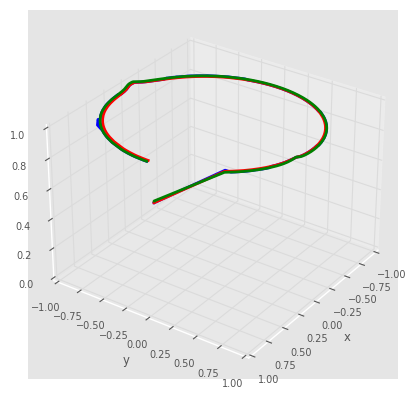

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2 * np.pi, 100)
x = 1*np.cos(theta)
y = 1*np.sin(theta)
z = 1
#ax.plot(x, y, z)
ax.plot(T_calibx, T_caliby, T_calibz, color="b", linewidth=2)
#ax.plot(T_calibx[54:], T_caliby[54:], T_calibz[54:], color="b")
ax.plot(T_ix, T_iy, T_iz, color="r", linewidth=2)
ax.plot(T_px, T_py, T_pz, color="g", linewidth=2)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 1)
plt.xlabel("x")
plt.ylabel("y")
ax.view_init(30, 35)
plt.show()

In [75]:
# Trajectory using inverse kinematic solution for practical robot
%matplotlib notebook
qt = []
last_point = practical_robot.qr
a = last_point
for i, n in enumerate(tqdm(desired_joint_angles)):
    a = np.row_stack((a, rtb.jtraj(last_point, n, 1).q))
    last_point = n
practical_robot.plot(a, backend="pyplot", movie="calibrated.gif")
#practical_robot.plot(a, backend="swift")

100%|██████████| 298/298 [00:00<00:00, 8520.13it/s]


<IPython.core.display.Javascript object>

PyPlot3D backend, t = 14.950000000000077, scene:
  UR10

In [76]:
a = np.row_stack((rtb.jtraj(last_point, n, 1).q, rtb.jtraj(last_point, n, 1).q))
a

array([[-2.96000481e+00, -2.58562701e+00,  3.04825547e-01,
        -8.60791186e-01,  1.38920848e+00, -2.47745239e-14],
       [-2.96000481e+00, -2.58562701e+00,  3.04825547e-01,
        -8.60791186e-01,  1.38920848e+00, -2.47745239e-14]])